Ex.1

In [1]:
import pandas as pd 
df = pd.read_csv(r'/Users/admin/Desktop/python/di-bootcamp/week9/day3/exercisesxp/online_retail_II.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [2]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [4]:
df.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [5]:
# Convert 'InvoiceDate' to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')

# Extract date-related features
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')  # Year-Month
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day

In [6]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,YearMonth,Year,Month,Day
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12,2009,12,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12,2009,12,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12,2009,12,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12,2009,12,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12,2009,12,1


Analyze trends over time

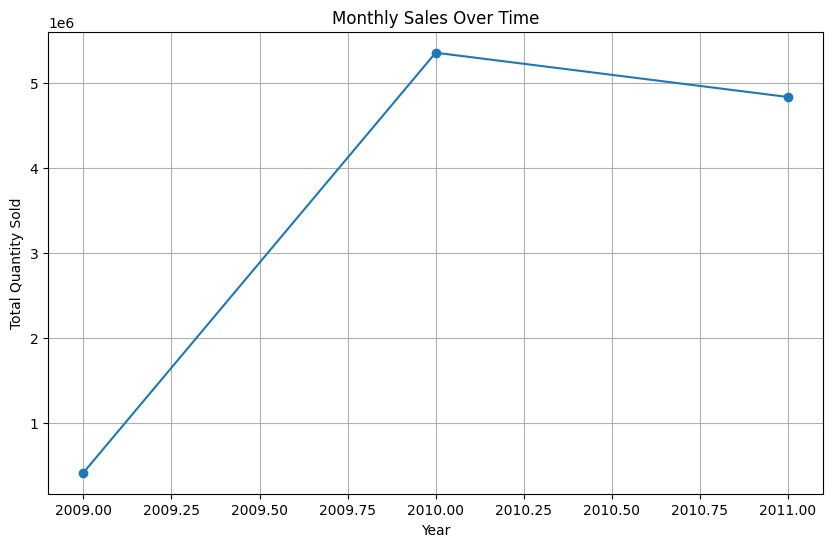

In [8]:
import matplotlib.pyplot as plt
monthly_sales = df.groupby('Year')['Quantity'].sum()
monthly_sales.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Monthly Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()

For the reason that dataset contains only 2 years, i want to check trends over time using yearmonth column

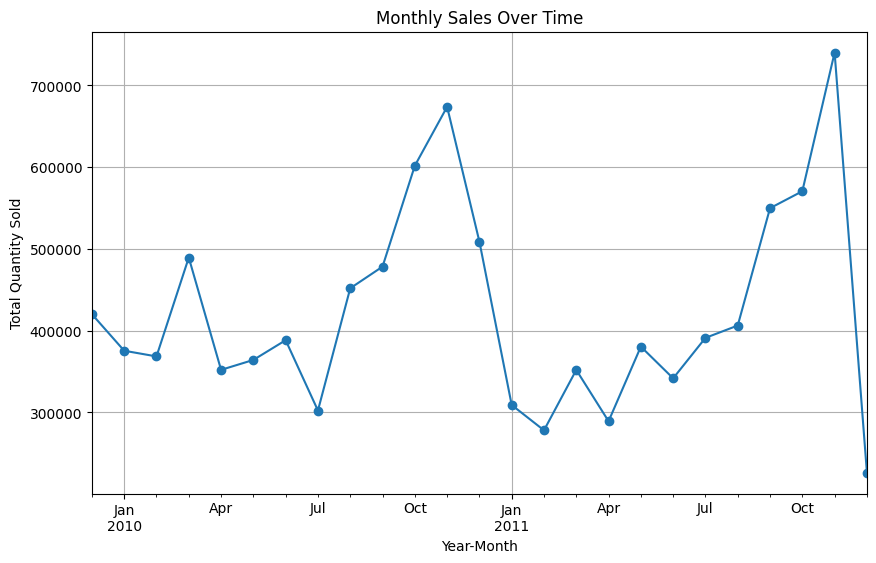

In [11]:
monthly_sales = df.groupby('YearMonth')['Quantity'].sum()
monthly_sales.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Monthly Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()

We can observe a peak in November 2011, followed by November 2010. Probably this pattern connected to Black Friday and Black November, and all of the sales provided in November. 
The lowest indicators was in July, also in both 2010 and 2011. The reason of this could probably be vocations.

Let's further analyze monthly trends.

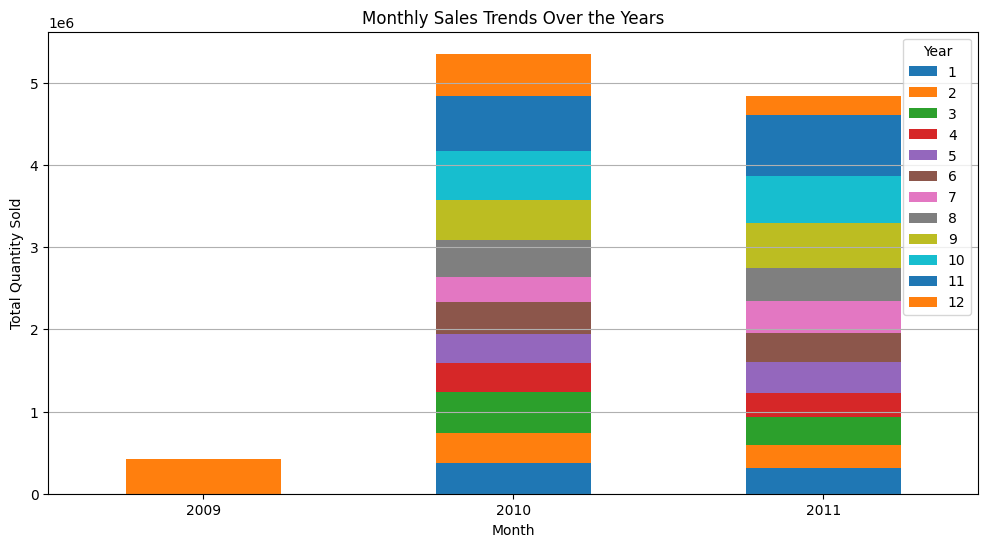

In [12]:
# Monthly trends analysis
monthly_trends = df.groupby(['Year', 'Month'])['Quantity'].sum()
monthly_trends.unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Monthly Sales Trends Over the Years')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.grid(axis='y')
plt.show()


We can observe that in total in 2010 more products were sold. This plot helped also to see better, that in Octobers in both 2010 and 2011 , sales figures are also quite high.
In 2010 the lowest sales were in July, then on monthes April - June . So in Spring - Summer piriod.
In 2011 the lowest sales were in April and in January. In June - July also pretty low indicators. 

We might further explore the monthly sales patterns for each year separately

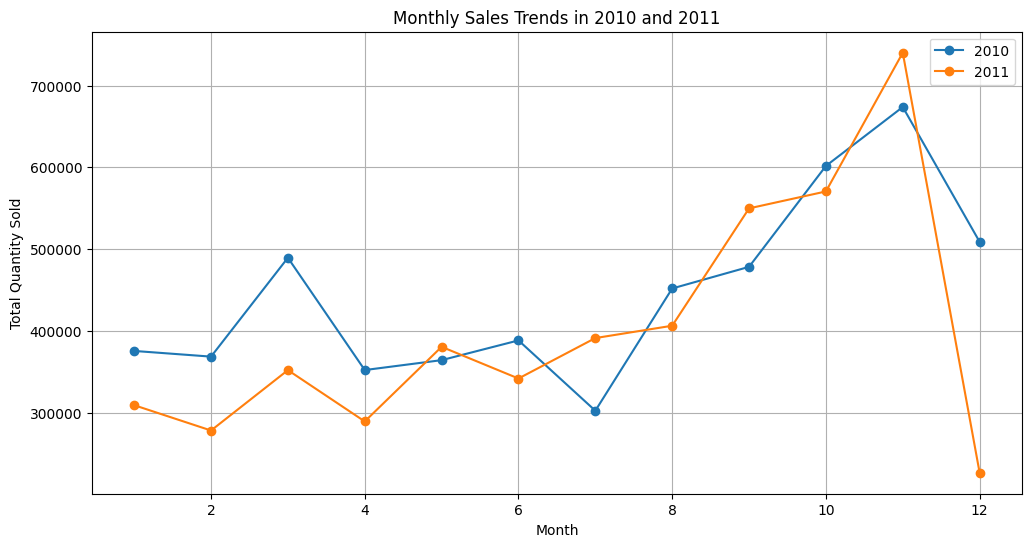

In [13]:
# Monthly sales trends for each year
monthly_trends_2010 = df[df['Year'] == 2010].groupby('Month')['Quantity'].sum()
monthly_trends_2011 = df[df['Year'] == 2011].groupby('Month')['Quantity'].sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_trends_2010.index, monthly_trends_2010, label='2010', marker='o')
plt.plot(monthly_trends_2011.index, monthly_trends_2011, label='2011', marker='o')
plt.title('Monthly Sales Trends in 2010 and 2011')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.legend()
plt.grid(True)
plt.show()


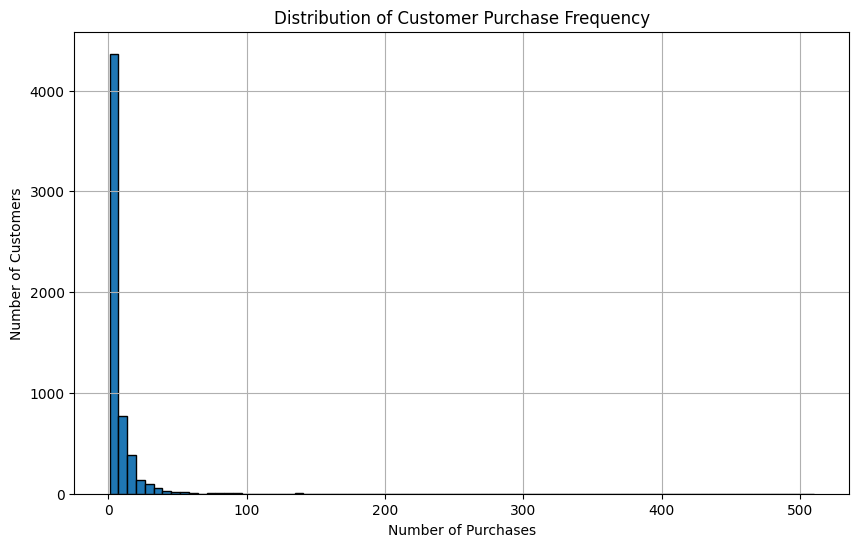

In [15]:
# Analyze trends by customer
customer_purchase_count = df.groupby('Customer ID')['Invoice'].nunique()
customer_purchase_count.hist(bins=80, edgecolor='black', figsize=(10, 6))
plt.title('Distribution of Customer Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

The distribution of customer purchase frequency, where the highest bin represents the customers with the smallest number of purchases. This is a common pattern in customer purchase behavior and is often referred to as a "long tail" distribution. The majority of customers make a small number of purchases, while a smaller percentage of customers contribute to a larger number of transactions.

The distribution of customer purchases based on segmentation:

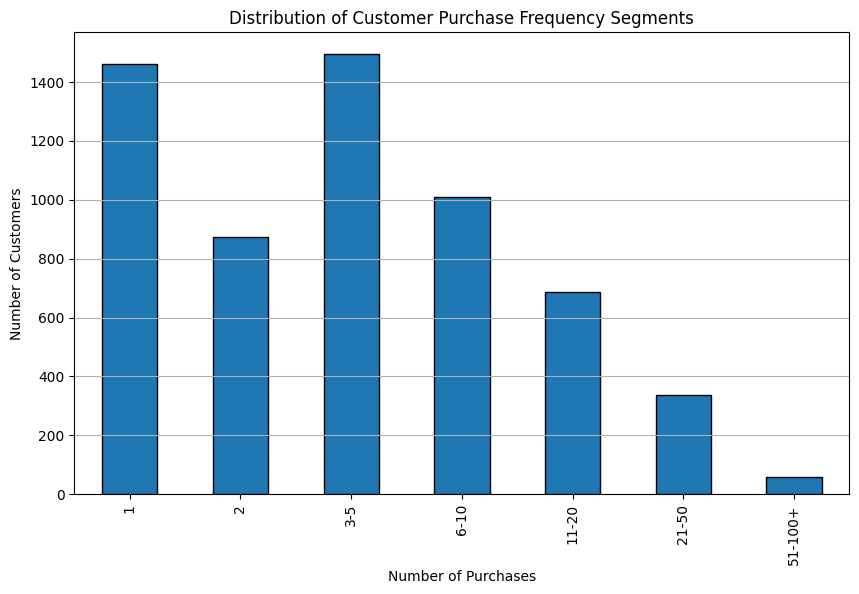

In [16]:
# Create segments based on customer purchase frequency
bins = [0, 1, 2, 5, 10, 20, 50, 100]
labels = ['1', '2', '3-5', '6-10', '11-20', '21-50', '51-100+']
df['PurchaseFrequencySegment'] = pd.cut(customer_purchase_count, bins=bins, labels=labels)

# Plot the distribution of customer segments
plt.figure(figsize=(10, 6))
df['PurchaseFrequencySegment'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.title('Distribution of Customer Purchase Frequency Segments')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


We can observe the latgest number of customers made 3-5 purchases, followed by 1 purchase. 

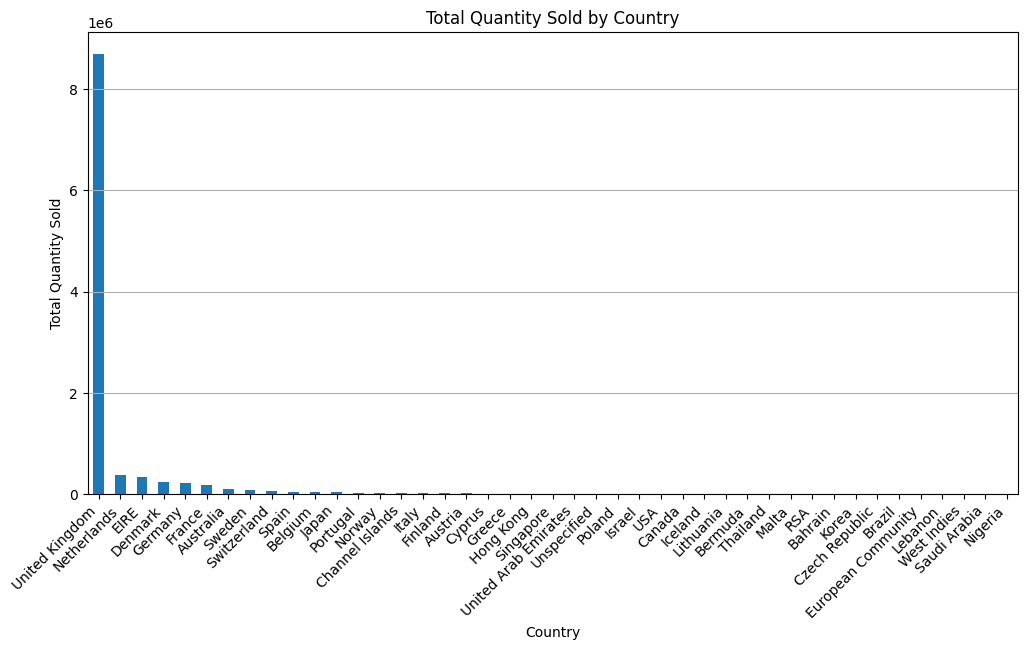

In [18]:
# Analyze trends by country
country_purchase = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
country_purchase.plot(kind='bar', figsize=(12, 6))
plt.title('Total Quantity Sold by Country')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

The majority of customers are from the United Kingdom, followed by the Netherlands and EIRE. Understanding the distribution of sales by country is crucial for tailoring marketing strategies, managing inventory, and addressing the needs of different customer segments.



How buying patterns can inform business strategies and marketing efforts


Analyzing buying patterns can provide valuable insights that inform business strategies and marketing efforts in various ways. Here are some key ways in which understanding buying patterns can be beneficial:

Segmentation and Targeting:

Identify Customer Segments: Analyzing buying patterns helps identify distinct customer segments based on behaviors, preferences, and purchasing frequency.
Targeted Marketing: Tailor marketing strategies for each segment to address their specific needs and preferences. This can lead to more effective and personalized campaigns.
Product and Inventory Management:

Popular Products: Identify which products are most popular and adjust inventory levels accordingly. Ensure that high-demand products are well-stocked to meet customer demand.
Seasonal Variations: Recognize seasonal buying patterns to optimize product launches and promotions, aligning with peak demand periods.
Pricing Strategies:

Optimal Pricing: Understand price sensitivity by analyzing purchasing behavior. Adjust pricing strategies based on customer responses to maximize revenue and competitiveness.
Discounts and Promotions: Offer targeted discounts or promotions during low-demand periods to stimulate sales.
Customer Loyalty and Retention:

Retention Strategies: Analyze customer lifetime value and purchase frequency to design effective customer retention strategies. Implement loyalty programs or personalized incentives for repeat customers.
Engagement Campaigns: Develop engagement campaigns to re-engage customers who haven't made a purchase in a while.
Supply Chain and Logistics Optimization:

Forecasting: Use historical buying patterns to forecast future demand accurately. This helps in optimizing supply chain and logistics operations.
Stock Management: Minimize overstock and stockouts by aligning inventory levels with expected demand.
Marketing Channel Effectiveness:

Channel Attribution: Assess the effectiveness of different marketing channels by analyzing which channels contribute most to conversions. Allocate resources to the most impactful channels.
Campaign Performance: Evaluate the performance of marketing campaigns to identify successful strategies and areas for improvement.
Geographic Expansion:

Identify Growth Opportunities: Explore markets with emerging buying patterns and growth potential. Consider expanding marketing efforts in regions showing increased interest in products or services.
Customer Experience Enhancement:

Personalization: Use buying patterns to personalize the customer experience. Recommend products based on past purchases and provide relevant content.
Feedback and Improvement: Gather feedback from customers to understand their preferences and experiences, facilitating continuous improvement.
Competitor Analysis:

Competitive Positioning: Analyze how buying patterns compare with competitors. Identify opportunities to differentiate your offerings and improve market positioning.
Risk Mitigation:

Fraud Detection: Detect unusual buying patterns that may indicate fraudulent activities. Implement measures to mitigate the risk of fraud.
By leveraging insights from buying patterns, businesses can make data-driven decisions, enhance customer satisfaction, optimize operations, and stay competitive in the market. Regularly monitoring and adapting to changing buying behaviors enables businesses to remain agile and responsive to customer needs.

Ex.3

In [20]:
from sklearn.ensemble import IsolationForest

# Extract relevant features
X = df[['Quantity']]

# Initialize the Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)

# Fit the model and predict anomalies
df['Anomaly'] = model.fit_predict(X)

# Filter out anomalies
anomalies = df[df['Anomaly'] == -1]

# Print information about anomalies
print("Number of anomalies detected:", len(anomalies))
print("Anomalies:")
print(anomalies[['Quantity', 'Anomaly']].head())



Number of anomalies detected: 51074
Anomalies:
    Quantity  Anomaly
3         48       -1
58        60       -1
61        56       -1
62        56       -1
63        60       -1


It seems that the Isolation Forest model has identified a considerable number of anomalies in the 'Quantity' column, with a total of 51,074 anomalies detected.
Let's explore additional features and visualize the anomalies.

Anomalies with additional information:
    Quantity  Anomaly Invoice StockCode                          Description  \
3         48       -1  489434     22041         RECORD FRAME 7" SINGLE SIZE    
58        60       -1  489438     20711                      JUMBO BAG TOYS    
61        56       -1  489438    84031A   CHARLIE+LOLA RED HOT WATER BOTTLE    
62        56       -1  489438    84031B  CHARLIE LOLA BLUE HOT WATER BOTTLE    
63        60       -1  489438    84032A   CHARLIE+LOLA PINK HOT WATER BOTTLE   

           InvoiceDate  Price  Customer ID         Country  
3  2009-12-01 07:45:00    2.1      13085.0  United Kingdom  
58 2009-12-01 09:24:00    1.3      18102.0  United Kingdom  
61 2009-12-01 09:24:00    3.0      18102.0  United Kingdom  
62 2009-12-01 09:24:00    3.0      18102.0  United Kingdom  
63 2009-12-01 09:24:00    1.9      18102.0  United Kingdom  


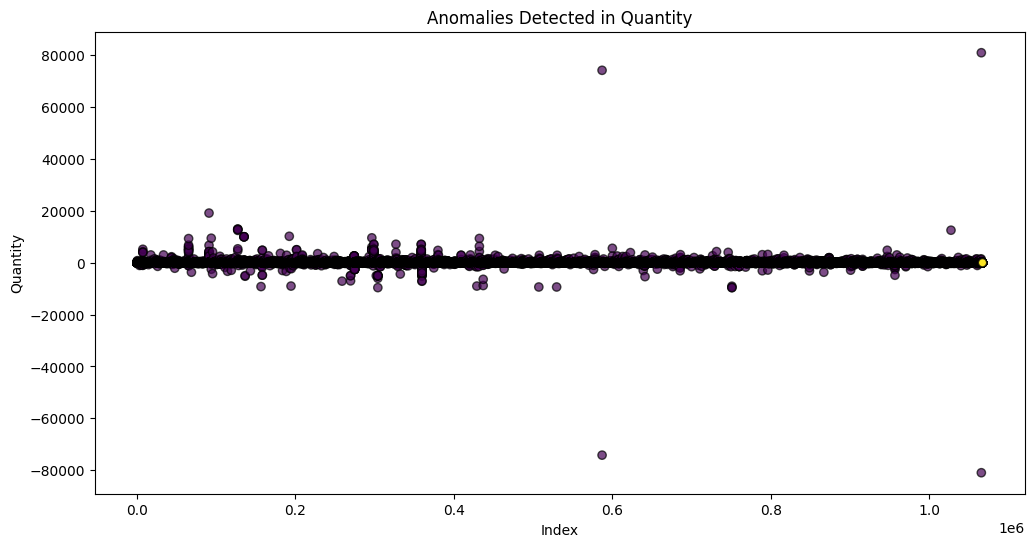

In [21]:
# Investigate anomalies by exploring additional features
print("Anomalies with additional information:")
print(anomalies[['Quantity', 'Anomaly', 'Invoice', 'StockCode', 'Description', 'InvoiceDate', 'Price', 'Customer ID', 'Country']].head())

# Visualize anomalies in the Quantity column
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['Quantity'], c=df['Anomaly'], cmap='viridis', marker='o', edgecolors='k', alpha=0.7)
plt.title('Anomalies Detected in Quantity')
plt.xlabel('Index')
plt.ylabel('Quantity')
plt.show()


From the scatter plot, it seems that most of the data points are concentrated within a certain range (around -20,000 to +20,000 in the 'Quantity' column), but there are some points that are significantly distant from the majority of the data. These remote points, with values like -80,000 and +80,000, are likely the anomalies detected by the Isolation Forest model.

Check for Errors or Outliers:

Extreme Value Anomalies:
         Quantity  Invoice StockCode                     Description  \
587080      74215   541431     23166  MEDIUM CERAMIC TOP STORAGE JAR   
587085     -74215  C541433     23166  MEDIUM CERAMIC TOP STORAGE JAR   
1065882     80995   581483     23843     PAPER CRAFT , LITTLE BIRDIE   
1065883    -80995  C581484     23843     PAPER CRAFT , LITTLE BIRDIE   

                InvoiceDate  Price  Customer ID         Country  
587080  2011-01-18 10:01:00   1.04      12346.0  United Kingdom  
587085  2011-01-18 10:17:00   1.04      12346.0  United Kingdom  
1065882 2011-12-09 09:15:00   2.08      16446.0  United Kingdom  
1065883 2011-12-09 09:27:00   2.08      16446.0  United Kingdom  


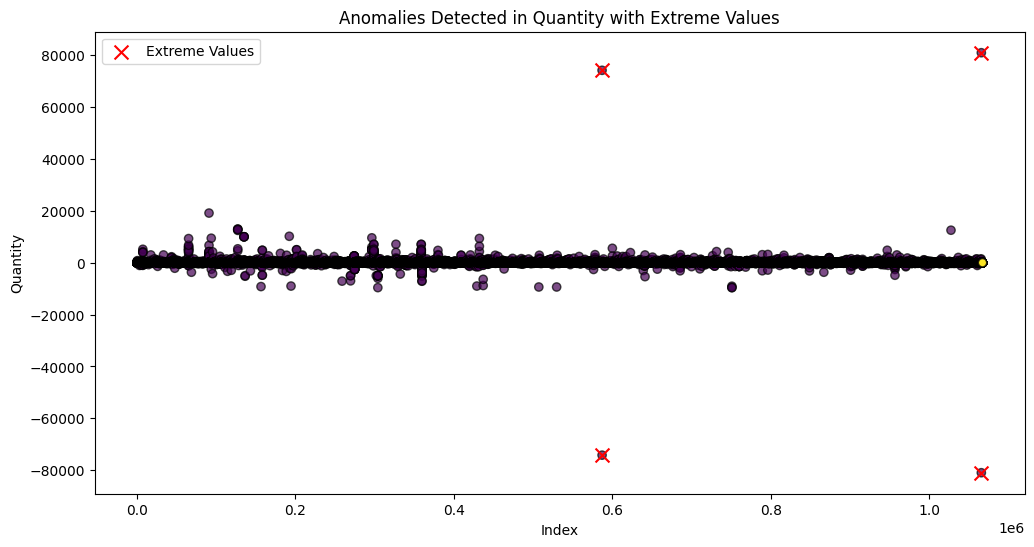

In [22]:
# Extract extreme value anomalies for investigation
extreme_value_anomalies = anomalies[(anomalies['Quantity'] < -20000) | (anomalies['Quantity'] > 20000)]

# Display information about extreme value anomalies
print("Extreme Value Anomalies:")
print(extreme_value_anomalies[['Quantity', 'Invoice', 'StockCode', 'Description', 'InvoiceDate', 'Price', 'Customer ID', 'Country']])

# Explore the distribution of extreme values
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['Quantity'], c=df['Anomaly'], cmap='viridis', marker='o', edgecolors='k', alpha=0.7)
plt.scatter(extreme_value_anomalies.index, extreme_value_anomalies['Quantity'], c='red', marker='x', s=100, label='Extreme Values')
plt.title('Anomalies Detected in Quantity with Extreme Values')
plt.xlabel('Index')
plt.ylabel('Quantity')
plt.legend()
plt.show()


Evaluating of the significance of detected anomalies and potential causes.

To evaluate the significance of the detected anomalies and discuss potential causes, you can further analyze the specific transactions flagged as anomalies. Here's a step-by-step approach to understanding their significance and exploring potential causes:
- Review Descriptive Statistics:
Calculate summary statistics for the 'Quantity' column, both overall and for the anomalies. Compare mean, median, and other relevant measures to assess the impact of anomalies on the overall distribution.
- Visualize Anomalies in Context, what we already did.
- Explore Contextual Information, we alredy fatches an additional information about anomalies.
- Consider Business Context:

Consult with domain experts or business stakeholders to understand the business context. Discuss whether the detected anomalies align with expected behavior or if there are potential issues in the data.

-Evaluate Impact on Key Metrics:

Assess how the detected anomalies might impact key business metrics, such as total sales, customer satisfaction, or inventory management. Consider the potential financial or operational implications.
-Identify Potential Causes:

Formulate hypotheses about the potential causes of anomalies. Consider factors such as data entry errors, system glitches, fraud, or genuine but unusual customer behavior.

In [23]:
# Summary statistics for the 'Quantity' column
print("Overall Statistics:")
print(df['Quantity'].describe())

# Summary statistics for the 'Quantity' column with anomalies
print("\nStatistics for Anomalies:")
print(anomalies['Quantity'].describe())


Overall Statistics:
count    1.067371e+06
mean     9.938898e+00
std      1.727058e+02
min     -8.099500e+04
25%      1.000000e+00
50%      3.000000e+00
75%      1.000000e+01
max      8.099500e+04
Name: Quantity, dtype: float64

Statistics for Anomalies:
count    51074.000000
mean        86.600501
std        784.989317
min     -80995.000000
25%         48.000000
50%         50.000000
75%        100.000000
max      80995.000000
Name: Quantity, dtype: float64


The analysis reveals that the detected anomalies in the 'Quantity' column exhibit a shift in distribution with significantly larger mean and higher variability compared to the overall dataset. Extreme values, both negative and positive, indicate potential issues, such as returns or cancellations. Further investigation into transaction details and additional contextual information is needed to understand the nature of these anomalies.

Importance of Detecting Anomalies:
Detecting anomalies is crucial for several reasons:

Fraud Detection: Anomalies can be indicative of fraudulent activities, such as unusual purchasing patterns or unauthorized transactions.

Data Quality Assurance: Identifying anomalies helps maintain data quality by highlighting potential errors, inconsistencies, or outliers in the dataset.

Operational Insight: Understanding anomalies provides operational insights, allowing businesses to optimize processes, improve customer satisfaction, and enhance decision-making.

Financial Impact: Anomalies can impact key financial metrics, and detecting them early allows businesses to mitigate potential financial risks and losses.

Potential Causes of Anomalies:

Data Entry Errors: Mistakes during data entry can result in anomalies, especially when entering quantities or prices.

System Glitches: Technical issues or glitches in the system can lead to anomalies in transaction records.

Unusual Customer Behavior: Genuine but unusual customer behavior, such as bulk purchases, returns, or cancellations, can contribute to anomalies.

Fraudulent Activities: Anomalies may be indicative of fraudulent activities, such as unauthorized transactions or attempts to manipulate the system.

Seasonal Variations: Anomalies may be related to seasonal fluctuations, promotions, or specific events that influence customer behavior.

Incomplete Data: Missing or incomplete data can result in anomalies, especially if certain transactions or information are not properly recorded.

Identifying and understanding the causes of anomalies is essential for maintaining data integrity, safeguarding against potential risks, and making informed business decisions. Regular monitoring and analysis of anomalies contribute to overall data quality and business resilience.